# Phase 3 Review

![review guy](https://media.giphy.com/media/3krrjoL0vHRaWqwU3k/giphy.gif)

# TOC 

1. [Gradient Descent](#grad_desc)
2. [Logistic Regression](#logistic)
3. [Confusion Matrix](#con_mat)
4. [Accuracy/Precision/Recall/F1](#more_metric)
5. [auc_roc](#auc_roc)
3. [Algos](#algos)

<a id='grad_desc'></a>

## Gradient Descent

Question: What is a loss function? (Explain it in terms of the relationship between true and predicted values) 


In [1]:
# a measure of the descrepancy between the true values and those predicted by the model.

Question: What loss functions do we know and what types of data work best with each?

In [2]:
# MSE - works best for linear regression or continuous data
# log loss - works for binary targets (0 and 1)
### ridge and lasso are modifications to those loss functions that penalise (?) coefficients 

To solidify our knowledge of gradient descent, we will use Sklearn's stochastic gradient descent algorithm for regression [SGDRegressor](https://scikit-learn.org/stable/modules/sgd.html#regression).   Sklearn classifiers share many methods and parameters, such as fit/predict, but some have useful additions.  SGDRegressor has a new method called partial_fit, which will allow us to inspect the calculated coefficients after each step of gradient descent.  

In [3]:
from sklearn.datasets import load_diabetes
import numpy as np

data = load_diabetes(as_frame=True)
X = data['data']
y = data['target']

In [4]:
X.shape

(442, 10)

In [5]:
X.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641


In [6]:
from sklearn.linear_model import SGDRegressor

In [7]:
# Instantiate a SGDRegressor object and run partial fit on X and y. For now, pass the argument `penalty=None`

In [8]:
model_1 = SGDRegressor(penalty=None, random_state = 42)
model_1.partial_fit(X,y)

SGDRegressor(penalty=None, random_state=42)

In [9]:
coef1 = model_1.coef_

In [10]:
from sklearn.metrics import mean_squared_error

rmse1 = mean_squared_error(y, model_1.predict(X), squared=False)

# Import mean_squared_error from metrics, and pass in the true ys, an array of predictions
# and the agrument squared = False

In [11]:
model_1.partial_fit(X,y)
coef2 = model_1.coef_

In [12]:
rmse2 = mean_squared_error(y, model_1.predict(X), squared=False)

Pick a coefficient, and explain the gradient descent update.


In [24]:
model_plot = SGDRegressor(penalty=None, random_state = 42)

RMSE = []
coef = []
i_list = []

i = 0
while i < 2000:
    model_plot.partial_fit(X,y)
    RMSE.append(mean_squared_error(y, model_plot.predict(X), squared=False))
    coef.append(model_plot.coef_[0])
    i_list.append(i)
    i+=1

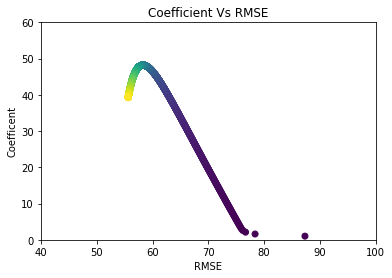

In [25]:
import matplotlib.pyplot as plt
   

plt.scatter(RMSE, coef, c = (i_list))
plt.title('Coefficient Vs RMSE')
plt.xlabel('RMSE')
plt.ylabel('Coefficent')
plt.ylim([0, 60])
plt.xlim([40, 100])
plt.show()

In [26]:
model_1 = SGDRegressor(penalty=None, random_state = 42, max_iter=2000)
model_1.fit(X,y)

C:\Users\clare\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1208: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


SGDRegressor(max_iter=2000, penalty=None, random_state=42)

In [27]:
model_1.coef_[0]

39.30607387077602

In [28]:
rmse_1 = mean_squared_error(y, model_1.predict(X), squared=False)
rmse_1

55.623507434594956

<a id='logistic'></a>

# Logistic Regression and Modeling

What type of target do we feed the logistic regression model?

In [31]:
# categorical binary

In [32]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer(as_frame=True)
X = data['data']
y = data['target']

In [33]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

Question: What is the purpose of train/test split?  


In [63]:
# to fit the model to one set and then see its performance on unseen data

Question: Why should we never fit to the test portion of our dataset?

In [35]:
# becasue then you can't compare loss functions between train and test to determine overfitting. 

In [36]:
from sklearn.preprocessing import StandardScaler

# Scale the training set using a standard scaler
ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_train)

In [39]:
import pandas as pd

In [43]:
pd.DataFrame(X_train_scaled).head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,-0.349138,-1.438513,-0.411726,-0.390479,-1.863662,-1.268607,-0.826171,-0.952866,-1.729368,-0.941541,...,-0.542685,-1.655655,-0.589864,-0.525560,-1.510669,-0.891500,-0.750217,-0.916711,-0.925086,-0.808411
1,-0.204687,0.312640,-0.133673,-0.275880,1.078073,0.863546,0.726314,0.898441,1.178770,1.474377,...,0.041487,0.689899,0.194128,-0.051934,1.129415,0.923942,1.222217,1.436560,1.149559,1.569111
2,-0.329312,-0.215072,-0.317394,-0.364357,-1.579880,-0.457451,-0.597310,-0.764588,0.275343,-0.501024,...,-0.435901,-0.148985,-0.320159,-0.446032,-1.634396,-0.106752,-0.539891,-0.723713,0.534970,-0.619348
3,1.027403,2.089824,1.046922,0.917584,0.316303,0.562037,1.048527,0.930437,-0.325697,-0.477474,...,1.113515,2.165006,1.165793,0.997696,0.383604,0.860948,1.872819,1.310691,0.152884,0.421636
4,1.828969,0.696001,1.763681,1.783821,-0.333674,0.628175,0.974660,1.265740,-0.131572,-1.713139,...,1.471556,0.387568,1.556276,1.385595,-0.577759,0.296680,0.595768,1.232995,0.050452,-1.406351


Question: Why is scaling our data important? For part of your answer, relate to one of the advantages of logistic regression over another classifier.

In [ ]:
#if you use a penalty term (ridge or lasso), coefficients will be
#penalised based on their size, which is related to the scale of the feature, 
#if it hasn't been scaled

# because it allows you to interpret the importance of the coefficients like for like, 
# logistic regression develops coefficients for features, rather than just dividing and dubdiving
# the data like a decision tree would

In [ ]:
# fit model with logistic regression to the appropriate portion of our dataset

In [65]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(random_state = 42)
lr.fit(X_train_scaled, y_train)

LogisticRegression(random_state=42)

Now that we have fit our classifier, the object `lr` has been filled up with information about the best fit parameters.  Take a look at the coefficients held in the `lr` object.  Interpret what their magnitudes mean.

In [66]:
lr.coef_

array([[-0.39751679, -0.41535774, -0.34832129, -0.45142016, -0.20791905,
         0.62039231, -0.73558933, -1.09376305,  0.23601875,  0.08357971,
        -1.28501592,  0.22136641, -0.58858571, -0.89527827, -0.19689721,
         0.63403697, -0.14135554, -0.40058728,  0.5262862 ,  0.73327971,
        -0.84378886, -1.29571675, -0.51790962, -0.82723207, -0.53895662,
         0.12288567, -1.00748469, -0.76642547, -1.21963558, -0.14580732]])

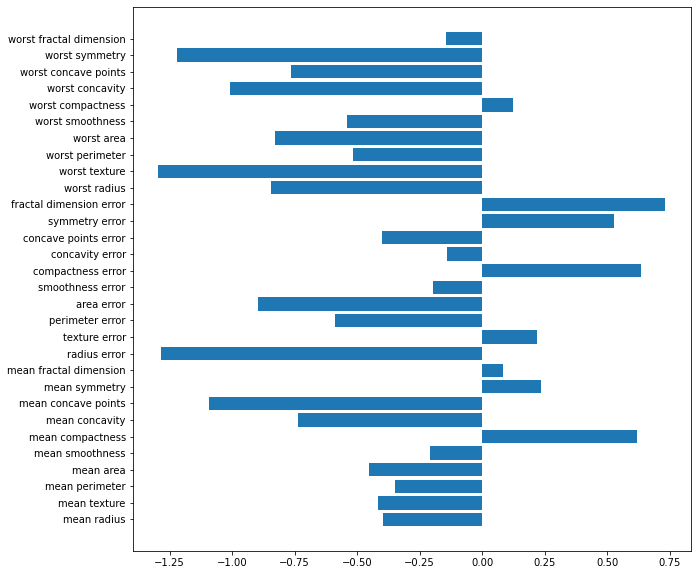

In [69]:
fig, ax = plt.subplots(figsize = (10,10))
ax.barh(X.columns, lr.coef_[0])
ax.tick_params(axis = 'x')

In [46]:
# larger coefficients tell us that those features are more relevant to the prediction

Logistic regression has a predict method just like linear regression.  Use the predict method to generate a set of predictions (y_hat_train) for the training set.

In [47]:
# use predict to generate a set of predictions
y_hat_train = lr.predict(X_train_scaled)

<a id='con_mat'></a>

### Confusion Matrix

Confusion matrices are a great way to visualize the performance of our classifiers. 

Question: What does a good confusion matrix look like?

In [ ]:
# a good confusion matrix has predicted values on the x axis and true values on the y axis
# the diagonal line from top left to bottom right is the true positives and should have larger
# numbers in those cells and smaller otherwise.


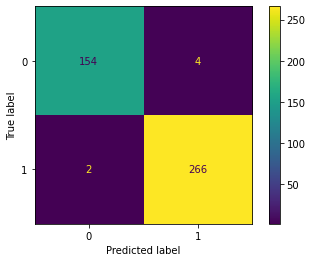

In [54]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(lr, X_train_scaled, y_train)


<a id='more_metrics'></a>

## Accuracy/Precision/Recall/F_1 Score

We have a bunch of additional metrics, most of which we can figure out from the CM

Question: Define accuracy. What is the accuracy score of our classifier?

In [ ]:
tn = confusion_matrix(y_train, y_hat_train)[0,0]
tp = confusion_matrix(y_train, y_hat_train)[1,1]
fp = confusion_matrix(y_train, y_hat_train)[0,1]
fn = confusion_matrix(y_train, y_hat_train)[1,0]

In [ ]:
# accuracy is the percentage of points for whom you have correctly identified the class
# acc = (TP + TN) / (total data points)

In [58]:
from sklearn.metrics import accuracy_score

accuracy_score(y_train, y_hat_train)


0.9859154929577465

Question: Why might accuracy fail to be a good representation of the quality of a classifier?

In [ ]:
# given a class imbalance, the accuracy may be high for the majority class and overwhelm
# the minuority class false negatives

Question: Define recall. What is the recall score of our classifier?

In [ ]:
#how many positives you correctly identified

# recall = (TP / (TP + FN))

In [59]:
from sklearn.metrics import recall_score

recall_score(y_train, y_hat_train)

0.9925373134328358

Question: Define precision? What is the precision score of our classifier?

In [60]:
# how many of the identified positives are true

# precision = (TP / (TP + FP))

In [61]:
from sklearn.metrics import precision_score

precision_score(y_train, y_hat_train)

0.9851851851851852

Question: Define f1 score? What is the f1 score score of our classifier?

In [62]:
#weighted average of precision and recall
# F1_score = 2 * recall * precision / (recall + precision)

from sklearn.metrics import f1_score

f1_score(y_train, y_hat_train)

0.9888475836431226

<a id='auc_roc'></a>

In [71]:
from sklearn.metrics import classification_report

print(classification_report(y_train, y_hat_train))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98       158
           1       0.99      0.99      0.99       268

    accuracy                           0.99       426
   macro avg       0.99      0.98      0.98       426
weighted avg       0.99      0.99      0.99       426



## Auc_Roc

The AUC_ROC curve can't be deduced from the confusion matrix.  Describe what the AUC_ROC curve shows. 
Look [here](https://towardsdatascience.com/understanding-auc-roc-curve-68b2303cc9c5) for some nice visualizations of AUC_ROC.

In [ ]:
#true positive rate v. false positive rate - helps to visualise amount of TP and FP with changing threshold
#default threshold is 0.5
#a good curve has as much area underneath as possible
#a good AUC_ROC score is approaching one, randomly guessing gets you 0.5

One of the advantages of logistic regression is that it generates a set of probabilities associated with each prediction.  What is the default threshold?  How would decrease or increasing your threshold affect true positive and false positive rates?


For our scaled X_train, generate an array of probabilities associated with the probability of the positive class.

In [75]:
y_hat_train_proba = lr.predict_proba(X_train_scaled)[:,1]
y_hat_train_proba

array([9.99968681e-01, 2.86372729e-03, 9.99269608e-01, 3.72508743e-06,
       1.56225670e-06, 3.12407064e-01, 9.99821120e-01, 5.70673632e-02,
       9.99859132e-01, 9.99990745e-01, 9.75398786e-01, 9.99178294e-01,
       6.18453263e-13, 1.13427902e-04, 9.99964009e-01, 9.90780240e-01,
       9.99982238e-01, 9.99999939e-01, 9.99567184e-01, 9.99815711e-01,
       9.97570884e-01, 7.33803170e-02, 9.99036228e-01, 9.99105247e-01,
       6.83299028e-01, 9.99979683e-01, 1.74319982e-02, 9.81099838e-01,
       9.98772191e-01, 9.99150500e-01, 9.26665623e-01, 9.97609453e-01,
       9.66511224e-01, 1.20477289e-01, 9.63918963e-01, 9.97954196e-01,
       9.81301874e-01, 9.16866033e-01, 9.26851529e-01, 9.99556534e-01,
       1.11925633e-02, 1.92824524e-04, 4.27388391e-02, 4.92050840e-01,
       9.28192270e-01, 6.31052182e-03, 9.99001091e-01, 2.32228401e-07,
       9.90446033e-01, 9.98741496e-01, 9.99981203e-01, 9.99405499e-01,
       3.23840169e-02, 7.72854562e-01, 9.99907632e-01, 1.28940353e-06,
      

In [77]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_train, y_hat_train_proba)




0.9972369166824107

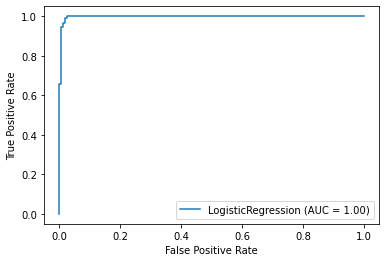

In [80]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(lr, X_train_scaled, y_train)

Now, using those probabilities, create two arrays, one which converts the probabilities to label predictions using the default threshold, and one using a threshold of .4.  How does it affect our metrics?

In [79]:
def prob_threshold(array, threshold):
    zeros = []
    ones = []
    for x in array:
        if x[1] >= threshold:
            ones.append(1)
        else:
            zeros.append(0)
    return len(zeros), len(ones)

pp = lr.predict_proba(X_train_scaled)

prob_threshold(pp, .5), prob_threshold(pp, .4)


((156, 270), (154, 272))

In [ ]:
# Plot the AUC_ROC curve for our classifier

<a id='algos'></a>

# More Algorithms

Much of the sklearn syntax is shared across classifiers and regressors.  Fit, predict, score, and more are methods associated with all sklearn classifiers.  They work differently under the hood. KNN's fit method simply stores the training set in memory. Logistic regressions .fit() does the hard work of calculating coefficients. 

![lazy_george](https://media.giphy.com/media/8TJK6prvRXF6g/giphy.gif)

However, each algo also has specific parameters and methods associated with it.  For example, decision trees have feature importances and logistic has coefficients. KNN has n_neighbors and decision trees has max_depth.


Getting to know the algo's and their associated properties is an important area of study. 

That being said, you now are getting to the point that no matter which algorithm you choose, you can run the code to create a model as long as you have the data in the correct shape. Most importantly, the target is the appropriate form (continuous/categorical) and is isolated from the predictors.

Here are the algos we know so far. 
 - Linear Regression
 - Lasso/Ridge Regression
 - Logistic Regression
 - Naive-Bayes
 - KNN
 - Decision Trees
 
> Note that KNN and decision trees also have regression classes in sklearn.


Here are two datasets from seaborn and sklearn.  Let's work through the process of creating simple models for each.

In [ ]:
import seaborn as sns
penguins = sns.load_dataset('penguins')
penguins.head()

In [ ]:
# split target from predictors

In [ ]:
one_random_student(quanggang)

In [ ]:
one_random_student(quanggang)

In [ ]:
# isolate numeric predictors

In [ ]:
one_random_student(quanggang)

In [ ]:
# Scale appropriately


In [ ]:
one_random_student(quanggang)

In [ ]:
# instantiate appropriate model and fit to appropriate part of data.


In [ ]:
one_random_student(quanggang)

In [ ]:
# Create a set of predictions

y_hat_train = None
y_hat_test = None


In [ ]:
one_random_student(quanggang)

In [ ]:
# Create and analyze appropriate metrics

In [ ]:
one_random_student(quanggang)

In [ ]:
from sklearn.datasets import load_boston
data = load_boston()
X = pd.DataFrame(data['data'], columns = data['feature_names'])
y = data['target']

In [ ]:
one_random_student(quanggang)

In [ ]:
# split target from predictors

In [ ]:
one_random_student(quanggang)

In [ ]:
# isolate numeric predictors

In [ ]:
one_random_student(quanggang)

In [ ]:
# Scale appropriately


In [ ]:
one_random_student(quanggang)

In [ ]:
# instantiate appropriate model and fit to appropriate part of data.


In [ ]:
one_random_student(quanggang)

In [ ]:
# Create a set of predictions

y_hat_train = None
y_hat_test = None


In [ ]:
one_random_student(quanggang)

In [ ]:
# Create and analyze appropriate metrics

In [ ]:
one_random_student(quanggang)